# Final Project | Statistical Learning
### Author: Saniya Abushakimova
Outline
0. Exploratory Data Analysis
1. Logistic Regression with Scikit-learn 
2. Reproducing the baseline result from scratch
3. Implementing the modification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

## 0. Exploratory Data Analysis

In [2]:
data = pd.read_csv('hazelnuts_preprocessed.csv')

In [3]:
data.head()

,length,width,thickness,surfacearea,mass,compactness,hardness,shelltopradius,watercontent,carbohydratecontent,variety
0,11.67,12.8025,8.055075,34.65,1375.50,0.93005,19.145,4.4604,0.048668,0.175,c_avellana
1,13.86,13.0995,7.349907,38.10,1439.55,0.93401,8.780,4.7844,0.048826,0.167,c_avellana
2,20.53,15.5925,9.565427,49.89,1623.30,0.96217,5.120,5.2893,0.049521,0.174,c_americana
3,14.13,12.2220,7.182949,35.43,1412.25,0.90178,13.694,4.8168,0.049595,0.167,c_avellana
4,15.85,14.7240,8.622661,43.29,1512.00,0.96261,10.925,4.6296,0.050384,0.173,c_americana


In [4]:
# Sample size, the number of attributes.
data.shape

(201, 11)

In [5]:
data.columns

Index(['length', 'width', 'thickness', 'surfacearea', 'mass', 'compactness',
       'hardness', 'shelltopradius', 'watercontent', 'carbohydratecontent',
       'variety'],
      dtype='object')

In [6]:
# Number of classes.
data["variety"].unique()

array(['c_avellana', 'c_americana', 'c_cornuta'], dtype=object)

In [7]:
data["variety"].value_counts()

c_americana    70
c_cornuta      66
c_avellana     65
Name: variety, dtype: int64

Our dataset describes hazelnuts. There are 10 different attributes, namely length, width, thickness, surfacearea, mass, compactness, hardness, shelltopradius, watercontent, carbohydratecontent. Based on these attributes, our task will be to predict variety of the hazelnut, whether it is c_avellana, c_americana or c_cornuta. Sample size is 201 hazelnuts (c_americana: 70, c_cornuta: 66, c_avellana: 65).

## 1. Multiclass Logistic Regression with Scikit-learn

In [8]:
# Normalizing the data.
features = ['length', 'width', 'thickness', 'surfacearea', 'mass', 'compactness',
       'hardness', 'shelltopradius', 'watercontent', 'carbohydratecontent']
data[features]= (data[features]-data[features].mean())/data[features].std()

In [9]:
data.head()

,length,width,thickness,surfacearea,mass,compactness,hardness,shelltopradius,watercontent,carbohydratecontent,variety
0,-1.050978,-1.121038,-0.618560,-1.149776,-1.131063,-1.138894,1.995372,-0.910924,-1.683203,1.476824,c_avellana
1,-0.546293,-0.944773,-1.344368,-0.750403,-0.658270,-0.984142,-0.276846,-0.167581,-1.672743,-1.294160,c_avellana
2,0.990809,0.534789,0.936000,0.614411,0.698103,0.116321,-1.079193,0.990795,-1.626835,1.130451,c_americana
3,-0.484071,-1.465557,-1.516213,-1.059483,-0.859788,-2.243655,0.800402,-0.093247,-1.621993,-1.294160,c_avellana
4,-0.087697,0.019346,-0.034360,-0.149607,-0.123471,0.133516,0.193381,-0.522733,-1.569850,0.784078,c_americana


In [10]:
# Adding artifical column of ones for a bias term.
np_ones = np.ones([data.shape[0],1])
data.insert(loc=0, column='bias', value=np_ones)

In [11]:
data.head()

,bias,length,width,thickness,surfacearea,mass,compactness,hardness,shelltopradius,watercontent,carbohydratecontent,variety
0,1.0,-1.050978,-1.121038,-0.618560,-1.149776,-1.131063,-1.138894,1.995372,-0.910924,-1.683203,1.476824,c_avellana
1,1.0,-0.546293,-0.944773,-1.344368,-0.750403,-0.658270,-0.984142,-0.276846,-0.167581,-1.672743,-1.294160,c_avellana
2,1.0,0.990809,0.534789,0.936000,0.614411,0.698103,0.116321,-1.079193,0.990795,-1.626835,1.130451,c_americana
3,1.0,-0.484071,-1.465557,-1.516213,-1.059483,-0.859788,-2.243655,0.800402,-0.093247,-1.621993,-1.294160,c_avellana
4,1.0,-0.087697,0.019346,-0.034360,-0.149607,-0.123471,0.133516,0.193381,-0.522733,-1.569850,0.784078,c_americana


In [12]:
# Dividing the data into train and test.
split = int(np.ceil(data.shape[0]*0.7))
X_train, y_train = data.iloc[:split,:11], data.iloc[:split,11]
X_test, y_test = data.iloc[split:,:11], data.iloc[split:,11]

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((141, 11), (141,), (60, 11), (60,))

In [14]:
from sklearn.linear_model import LogisticRegression

# Defining a multi-class logistic regression model.
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=75) # SAG - Stochastic Average Gradient Descent

# Fitting the model.
model.fit(X_train, y_train)

# Predicting labels for X_test.
y_hat = model.predict(X_test)

In [15]:
temp_2 = pd.DataFrame(columns = ['true', 'predicted'])
temp_2['true'] = y_test
temp_2['predicted'] = y_hat

In [16]:
temp_2.head()

,true,predicted
141,c_americana,c_americana
142,c_avellana,c_avellana
143,c_cornuta,c_cornuta
144,c_cornuta,c_cornuta
145,c_avellana,c_avellana


In [17]:
baseline_acc = model.score(X_test, y_test, sample_weight=None)
print(baseline_acc)

0.95


## 2. Reproducing the baseline result from scratch

In [18]:
# One-hot encoding for our target variables.
targets = data["variety"].unique()

temp_3 = np.zeros([data.shape[0],len(targets)])
y_encoded = pd.DataFrame(temp_3)

for i in range(len(targets)):
    for j in range(len(y_encoded)):
        if data["variety"].iloc[j] == targets[i]:
            y_encoded.iloc[j, i] = 1
        else: 
            y_encoded.iloc[j, i] = 0
            
y_encoded = y_encoded.to_numpy()

In [19]:
# 'c_avellana': 1 0 0
# 'c_americana': 0 1 0
# 'c_cornuta': 0 0 1
targets

array(['c_avellana', 'c_americana', 'c_cornuta'], dtype=object)

In [20]:
data['variety'].head(6)

0     c_avellana
1     c_avellana
2    c_americana
3     c_avellana
4    c_americana
5      c_cornuta
Name: variety, dtype: object

In [21]:
y_encoded[0:6]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
# Encoded y_train and y_test splits.
y_encoded_train, y_encoded_test = y_encoded[:split], y_encoded[split:]

In [23]:
def softmax(z, N):
    return np.exp(z)/np.exp(z).sum(axis=1).reshape((N, 1)) 

def CrossEntropy(y, P):
    return -np.vdot(y, np.log(P))

def evaluate(X, y, W, N):
    P = softmax(X @ W.T, N)
    
    return np.sum(CrossEntropy(y, P))

def Logistic_Regression(X, y, lr, epochs):
    start = time.time()
    
    N = X.shape[0]
    K = y.shape[1]
    d = X.shape[1] # Already contains bias term.
    W = np.zeros([K, d]) # Initialize weights.
    
    z = X @ W.T # Logits.
    P = softmax(z, N) # Probability distribution across all K classes.
    
    loss_list = []
    
    for e in range(1, epochs+1):
        
        # Gradient descent.
        z = X @ W.T
        P = softmax(z,N)
        W = W + lr*(X.T @ (y - P)).T
        
        loss = evaluate(X, y, W, N) # Calculating training loss.
        loss_list.append(loss)
        
        print("Epoch: {}, Training loss: {}".format(e, loss))
    
    end = time.time()
    
    return W, loss_list, P, (end - start)

# Making predictions.
def predict_labels(X, W):
    N = X.shape[0]
    
    predictions = []
    z = X @ W.T # Logits.
    P = softmax(z, N) # Probability distribution across all K classes.
    
    for row in P:
        predictions.append(np.argmax(row)) # Selecting the highest probability.
    
    return predictions

In [24]:
# Training.
W, loss_list, p_dist, softmax_time = Logistic_Regression(X_train.to_numpy(), y_encoded_train, lr=0.001, epochs=75)

Epoch: 1, Training loss: 128.7971408361958
Epoch: 2, Training loss: 113.27791724439095
Epoch: 3, Training loss: 103.25985437636677
Epoch: 4, Training loss: 96.22902531431669
Epoch: 5, Training loss: 90.95735193776008
Epoch: 6, Training loss: 86.80648528464488
Epoch: 7, Training loss: 83.4191396202902
Epoch: 8, Training loss: 80.58104742831455
Epoch: 9, Training loss: 78.15566357818764
Epoch: 10, Training loss: 76.05129250696658
Epoch: 11, Training loss: 74.2035426834343
Epoch: 12, Training loss: 72.56545547376159
Epoch: 13, Training loss: 71.10168286122429
Epoch: 14, Training loss: 69.78490373531284
Epoch: 15, Training loss: 68.59353115010475
Epoch: 16, Training loss: 67.51019312592075
Epoch: 17, Training loss: 66.52069350027912
Epoch: 18, Training loss: 65.61328048031635
Epoch: 19, Training loss: 64.77811840559735
Epoch: 20, Training loss: 64.00689746286608
Epoch: 21, Training loss: 63.29253945118314
Epoch: 22, Training loss: 62.62897198612406
Epoch: 23, Training loss: 62.010952501931

In [25]:
# Sum of probabilities across K classes are all equal to 1 (up to the nearest whole number).
for p in p_dist:
    print(p.sum())

1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0000000000000002
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999998
1.0
0.999999999999

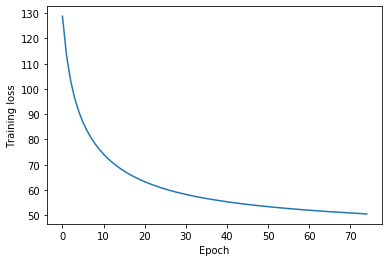

In [26]:
# Visualizing the results.
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.show()

In [27]:
# Predicting test set.
predictions = predict_labels(X_test.to_numpy(), W)

# Decoding predicted values.
decoded_pred = []

for pred in predictions:
    if (pred==0):
        decoded_pred.append('c_avellana')
    if (pred==1):
        decoded_pred.append('c_americana')
    if (pred==2):
        decoded_pred.append('c_cornuta')

compare = pd.DataFrame()
compare["predicted"] = decoded_pred
compare["true"] = y_test.values

In [28]:
compare

,predicted,true
0,c_americana,c_americana
1,c_avellana,c_avellana
2,c_cornuta,c_cornuta
3,c_cornuta,c_cornuta
4,c_avellana,c_avellana
5,c_cornuta,c_cornuta
6,c_avellana,c_avellana
7,c_cornuta,c_cornuta
8,c_cornuta,c_cornuta
9,c_avellana,c_avellana


In [29]:
# Calculating the accuracy.
misclassified = 0
for index, row in compare.iterrows():
    if row["predicted"]==row["true"]:
        misclassified += 1

rep_acc = misclassified/compare.shape[0]

In [30]:
print("Baseline accuracy:", baseline_acc)
print("Reproduced accuracy:", rep_acc)

Baseline accuracy: 0.95
Reproduced accuracy: 0.95


## 3. Implementing the modification

The main idea is to replace softmax function to an element-wise sigmoid.

In [31]:
def sigmoid(z):
    exp_z = np.exp(z)
    return exp_z/(1+exp_z)

def CrossEntropy(y, P):
    return -np.vdot(y, np.log(P))

def mod_evaluate(X, y, W):
    P = sigmoid(X @ W.T)
    
    return np.sum(CrossEntropy(y, P))

def mod_Logistic_Regression(X, y, lr, epochs):
    start = time.time()
    
    N = X.shape[0]
    K = y.shape[1]
    d = X.shape[1] # Already contains bias term.
    W = np.zeros([K, d]) # Initialize weights.
    
    z = X @ W.T # Logits.
    P = sigmoid(z)
    
    mod_loss_list = []
    
    for e in range(1, epochs+1):
        
        # Gradient descent.
        z = X @ W.T
        P = sigmoid(z)
        
        # Change gradient here! 
        W = W + lr*(X.T @ (y - P)).T
        
        mod_loss = mod_evaluate(X, y, W) # Calculating training loss.
        mod_loss_list.append(mod_loss)
        
        print("Epoch: {}, Training loss: {}".format(e, mod_loss))
    
    end = time.time()
        
    return W, mod_loss_list, P, (end - start)

# Making predictions.
def mod_predict_labels(X, W):
    N = X.shape[0]
    
    predictions = []
    z = X @ W.T # Logits.
    P = sigmoid(z)
    
    for row in P:
        predictions.append(np.argmax(row)) # Selecting the highest value.
    
    return predictions

In [32]:
mod_W, mod_loss_list, mod_p_dist, sigmoid_time = mod_Logistic_Regression(X_train, y_encoded_train, lr=0.001, epochs=75)

Epoch: 1, Training loss: 86.13323812688976
Epoch: 2, Training loss: 78.32173461628287
Epoch: 3, Training loss: 72.87056287005305
Epoch: 4, Training loss: 68.9109774668895
Epoch: 5, Training loss: 65.92854769695263
Epoch: 6, Training loss: 63.612530558195836
Epoch: 7, Training loss: 61.76846764463109
Epoch: 8, Training loss: 60.26994556293802
Epoch: 9, Training loss: 59.031761784358416
Epoch: 10, Training loss: 57.99458039885681
Epoch: 11, Training loss: 57.11586106648674
Epoch: 12, Training loss: 56.364313396363855
Epoch: 13, Training loss: 55.71639705371671
Epoch: 14, Training loss: 55.15404715711914
Epoch: 15, Training loss: 54.663155867555375
Epoch: 16, Training loss: 54.23253379451563
Epoch: 17, Training loss: 53.85318371684983
Epoch: 18, Training loss: 53.517782393825996
Epoch: 19, Training loss: 53.220304019501626
Epoch: 20, Training loss: 52.95574199878549
Epoch: 21, Training loss: 52.71990021197544
Epoch: 22, Training loss: 52.50923420903795
Epoch: 23, Training loss: 52.3207288

In [33]:
# Sum of "probabilities" across K classes are not equal to 1.
for index, row in mod_p_dist.iterrows():
    print(row.sum())

1.0264405861520771
1.0292903346908193
0.9992211341920321
1.042864725975786
0.7458552632280052
1.1315831166999097
1.2390957033001002
1.0000284087043363
0.8978603768859689
0.9557839764354115
1.2418903019866598
1.107470004929312
1.0436426264937235
0.8011991670384114
1.2209356133449834
0.9158896062825789
1.1695040475741285
1.3200159405412881
1.1821782126771294
1.1715448966582147
1.001685532570915
1.0200071126514532
0.9856183691420931
1.014023964870532
1.08986721777774
1.0505942447757062
1.0467937394649118
0.7346643866409345
1.2576600518135375
1.036273690299632
1.0809656076594367
1.0219652112320974
1.0392409322331355
0.987170085484721
1.223192996667136
0.9362467088820662
1.0496274215588148
1.0673503602371164
1.2325113255306714
1.0134817090236234
0.991429570494015
1.213557467101324
1.194346701224692
0.8813813297833183
1.068103780389453
1.08308154375903
1.091328780786514
1.0057408914930168
1.0752851729844954
0.9533435331568599
1.0963764971171317
1.048353520620099
1.129347664392901
1.062911866

### Comparison between softmax and sigmoid based Multiclass Logistic Regression

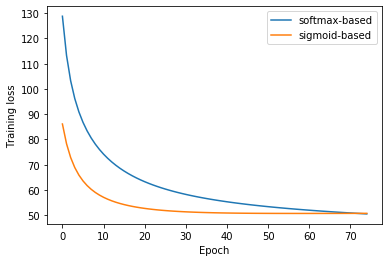

In [34]:
# Visualizing the results.
plt.plot(loss_list, label='softmax-based')
plt.plot(mod_loss_list, label='sigmoid-based')
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.legend()
plt.savefig('graphs.png')
plt.show()

In [35]:
print("Time taken for softmax-based: {} sec".format(softmax_time))
print("Time taken for sigmoid-based: {} sec".format(sigmoid_time))

Time taken for softmax-based: 0.03468585014343262 sec
Time taken for sigmoid-based: 1.087425947189331 sec


In [36]:
# Predicting test set.
mod_predictions = mod_predict_labels(X_test.to_numpy(), W)

# Decoding predicted values.
mod_decoded_pred = []

for pred in mod_predictions:
    if (pred==0):
        mod_decoded_pred.append('c_avellana')
    if (pred==1):
        mod_decoded_pred.append('c_americana')
    if (pred==2):
        mod_decoded_pred.append('c_cornuta')

mod_compare = pd.DataFrame()
mod_compare["predicted"] = mod_decoded_pred
mod_compare["true"] = y_test.values

In [37]:
mod_compare

,predicted,true
0,c_americana,c_americana
1,c_avellana,c_avellana
2,c_cornuta,c_cornuta
3,c_cornuta,c_cornuta
4,c_avellana,c_avellana
5,c_cornuta,c_cornuta
6,c_avellana,c_avellana
7,c_cornuta,c_cornuta
8,c_cornuta,c_cornuta
9,c_avellana,c_avellana


In [38]:
# Calculating the accuracy.
mod_misclassified = 0
for index, row in mod_compare.iterrows():
    if row["predicted"]==row["true"]:
        mod_misclassified += 1

mod_rep_acc = mod_misclassified/mod_compare.shape[0]

In [39]:
print("Softmax-based MLR accuracy:", rep_acc)
print("Sigmoid-based MLR accuracy:", mod_rep_acc)

Softmax-based MLR accuracy: 0.95
Sigmoid-based MLR accuracy: 0.95
